In [6]:
# A partir del startingPoint1.ipynb

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

In [31]:
df = pd.read_csv("datasets/Data Carrard.csv")
df = df.drop('id', axis=1)

In [32]:
df_num = df[['age', 'jspe', 'qcae_cog', 'qcae_aff', 'amsp', 'erec_mean', 'cesd', 'stai_t', 'mbi_ex', 'mbi_cy', 'mbi_ea']]

In [33]:
scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_num)

pca = PCA(n_components=0.95)

pca.fit(df_num_scaled)

pca_features = pca.transform(df_num_scaled)

In [34]:
model = KMeans(n_clusters=3)
clusters = model.fit_predict(pca_features)

c:\Users\aluce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\aluce\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


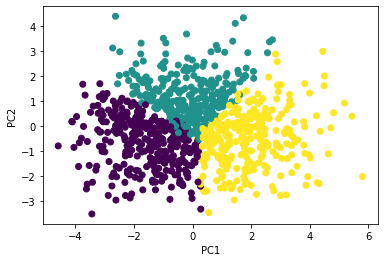

In [35]:
plt.scatter(pca_features[:,0], pca_features[:,1], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [37]:
silhouette_avg = silhouette_score(pca_features, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.127478036091558
